<h1>Newark international Airport's current capabilities</h1>

<h3>Objective: </h3>

<p>You have been assigned by Newark International Airport's Engineering Manager to conduct an analysis of the airport's current capabilities and identify key metrics that can improve the airport's administration. You have been provided with several data files: nyc_airlines.csv, nyc_airports.csv, nyc_flights.csv, nyc_planes.csv, and nyc_weather.csv. Your task is to develop a Dashboard using a Notebook and/or BI tool to present the following information: </p>

<h4>Overall Pane:</h4>
1. Determine the number of distinct destinations connected to the airport. 

2. Calculate the rounded average of distinct destinations for each day.

3. Calculate the average number of destinations per day of the week.

4. Identify the month with the highest number of flights.
<h4>Dealing with Delays:</h4>
5. Identify the month with the highest accumulated departure delay.

6. Analyze the correlation between departure delay and weather conditions by cross-referencing the departure delay data with the weather dataset.
<h4>Airlines:</h4>
7. Create a ranking of airlines based on the number of flights they operate.

8. Create a ranking of airlines based on the daily availability of seats.
<h4>Airplanes:</h4>
9. Determine the most common plane manufacturer. 

10. Identify the most common plane model.

In [1]:
import os
from datetime import time, datetime
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#This cell stores functions and methods useful across the analysis, like an utils files
def sep_identifier(file_path):
    """Function to detect, collect and return the kind of 
    delimiter of each file"""
    with open(file_path, encoding='utf-8') as csvfile:
        dialect = csv.Sniffer().sniff(csvfile.read())
        return dialect.delimiter

<h2>Exploratory Data Analysis</h2>

In [3]:
path = './dataset/'

In [4]:
df = pd.read_csv("./dataset/nyc_airlines.csv")

In [5]:
dataframes = {}
for file in os.listdir(path):
    full_path = os.path.join(path, file)
    if file.endswith('.csv'):
        df = pd.read_csv(
                filepath_or_buffer= full_path,
                sep= sep_identifier(full_path))
        name = file.split(".")[0]
        dataframes[name] = df

In [6]:
#List of the dataframes names
dataframes.keys()

dict_keys(['nyc_weather', 'nyc_flights_fixed', 'nyc_planes', 'nyc_airlines', 'nyc_airports'])

In [7]:
dataframes['nyc_weather'].head(1)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z


In [8]:
dataframes['nyc_airports'].head(2)

,faa,name,latitude,longitude,altitude,timezone,dst,timezone_name
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago


In [9]:
#Deleting the first column, false index
dataframes['nyc_flights_fixed'].drop([dataframes['nyc_flights_fixed'].columns[0]], axis=1, inplace=True)

dataframes['nyc_flights_fixed'].head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01T11:00:00Z
4,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01T10:00:00Z


<h2>Overall Pane</h2>

<b>1. Determine the number of distinct destinations connected to the airport.</b>

In [10]:
destinations = dataframes['nyc_airports']['name'].nunique()
print(f"The number of distinct destinations connected to the airport is: {destinations}")

The number of distinct destinations connected to the airport is: 1440


<b>2. Calculate the rounded average of distinct destinations for each day.</b>

In [11]:
#Parsing time_hour object datatype to datetime
dataframes['nyc_flights_fixed']["time_hour"] = pd.to_datetime(dataframes['nyc_flights_fixed']["time_hour"])

#Creating a date column to have each day of the year
dataframes['nyc_flights_fixed']['date'] = dataframes['nyc_flights_fixed']['time_hour'].apply(
                                                lambda x: x.strftime("%Y-%m-%d"))

#Sub dataframe for simplify the analysis
destinations_by_day = dataframes['nyc_flights_fixed'][['dest','date']]

#Parsing date to datetime64
destinations_by_day['date'] = pd.to_datetime(destinations_by_day['date'])

#Unique destinations by day 
destinations_by_day = destinations_by_day.groupby(by="date")['dest'].nunique().reset_index()

#Mean
mean_destination_by_day = round(destinations_by_day["dest"].mean(), 0)
print(f"The average of distinct destinations for each day is {mean_destination_by_day}")

The average of distinct destinations for each day is 81.0


/var/folders/_y/vt5j76wx4yg18hmk76j61vnr0000gn/T/ipykernel_46164/2014699893.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  destinations_by_day['date'] = pd.to_datetime(destinations_by_day['date'])


<b>3. Calculate the average number of destinations per day of the week.</b>

In [12]:
#get the weekday
destinations_by_day['weekday'] = destinations_by_day['date'].apply(lambda x: x.strftime("%w"))

#Average number of destinations per day of the week
destinations_by_day.groupby(by="weekday")["dest"].mean().reset_index()

,weekday,dest
0,0,80.230769
1,1,81.923077
2,2,80.415094
3,3,79.641509
4,4,82.211538
5,5,81.596154
6,6,80.096154


[Text(0.5, 1.0, 'Average destinations per day of week')]

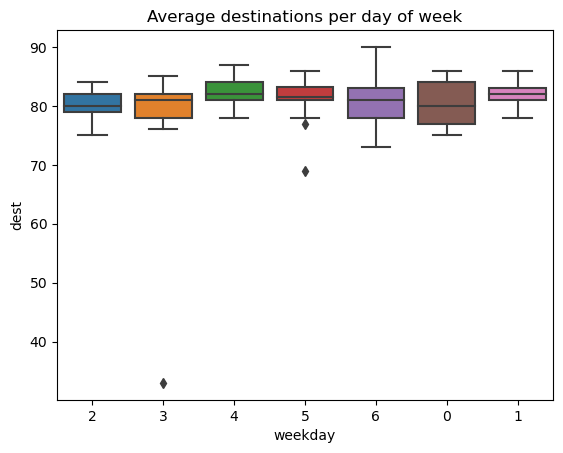

In [13]:
sns.boxplot(data= destinations_by_day, x='weekday', y='dest').set(title= "Average destinations per day of week")

<b>4. Identify the month with the highest number of flights.</b>

In [14]:
monthly_number_of_flights = dataframes['nyc_flights_fixed'].groupby(by='month')['flight'].count().reset_index()
monthly_number_of_flights.sort_values(by="flight",ascending=False)

,month,flight
7,8,24290
9,10,24236
6,7,24174
4,5,23959
2,3,23650
3,4,23424
5,6,23258
11,12,23065
8,9,22954
10,11,22836


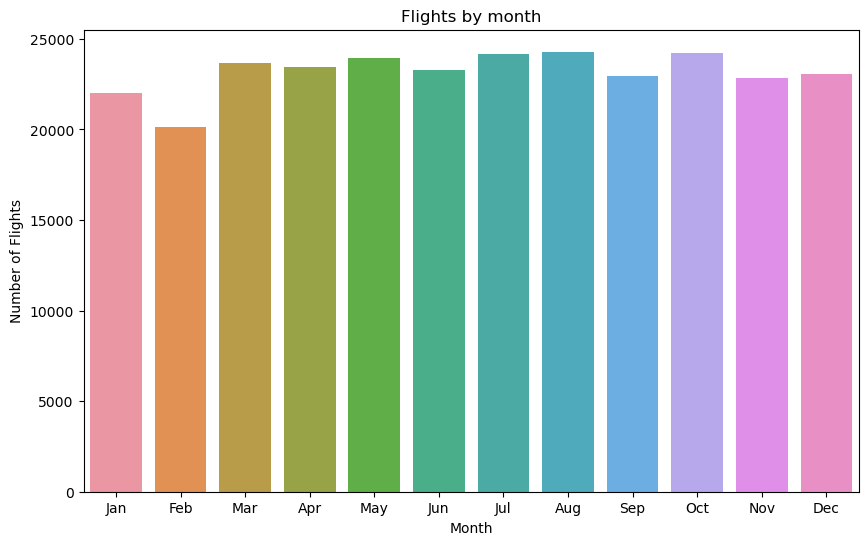

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(data= monthly_number_of_flights, x='month', y='flight')
plt.title("Flights by month")
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

<h2>Dealing with Delays</h2>

<b> 5. Identify the month with the highest accumulated departure delay</b>

In [16]:
### Departure delay is an attribute of the dataset ncy flights fixed

# We are looking for delays, so it's important to select just those cases
# with delays, subtract negatives and 0

dep_delay = dataframes['nyc_flights_fixed'][dataframes['nyc_flights_fixed']['dep_delay'] > 0].reset_index(drop=True)

#Grouping by month and adding the delayed minutes, finally ordering by descending order
delay_by_month = dep_delay.groupby(by='month')['dep_delay'].sum().reset_index()
delay_by_month.sort_values(by='dep_delay', ascending=False)


,month,dep_delay
6,7,583738
5,6,540930
11,12,436007
3,4,392685
2,3,390853
4,5,375263
7,8,374271
0,1,293984
1,2,274478
9,10,243213


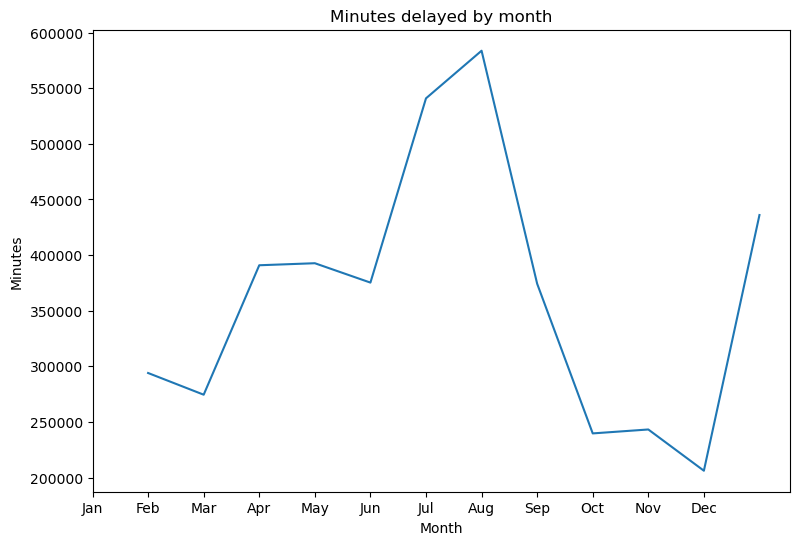

In [17]:
#Plotting the data
plt.figure(figsize=(9,6))
sns.lineplot(data=delay_by_month, x='month', y='dep_delay')
plt.title("Minutes delayed by month")
plt.xlabel("Month")
plt.ylabel("Minutes")
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

<b>6. Analyze the correlation between departure delay and weather conditions by cross-referencing the departure delay data with the weather dataset.</b>

There is no a strong correlation between delays and weather conditions

In [18]:
#Casting time_hour into datetime format
dataframes['nyc_weather']['time_hour'] = pd.to_datetime(dataframes['nyc_weather']['time_hour'])

#Creating a cross-referencing dataset merge on origin and datetime
cx_delays_weather = pd.merge(left=dataframes['nyc_weather'],
                    right=dataframes['nyc_flights_fixed'][['dep_delay','origin','time_hour']],
                    on=['origin','time_hour'],
                    how='inner')

#Wind gust is a numerical value, where we can use 0 instead of NaN
cx_delays_weather['wind_gust'].fillna(0, inplace=True)

#Now we can drop columns not useful for the correlation analysis
cx_delays_weather.drop(['origin','year','month','day','hour','time_hour'], axis=1, inplace=True)

<Axes: >

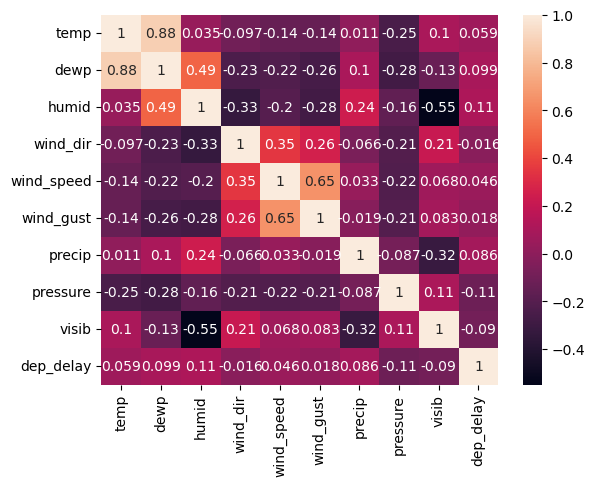

In [19]:
sns.heatmap(cx_delays_weather.corr(), annot=True)

/Users/brauliocastelblancocastro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


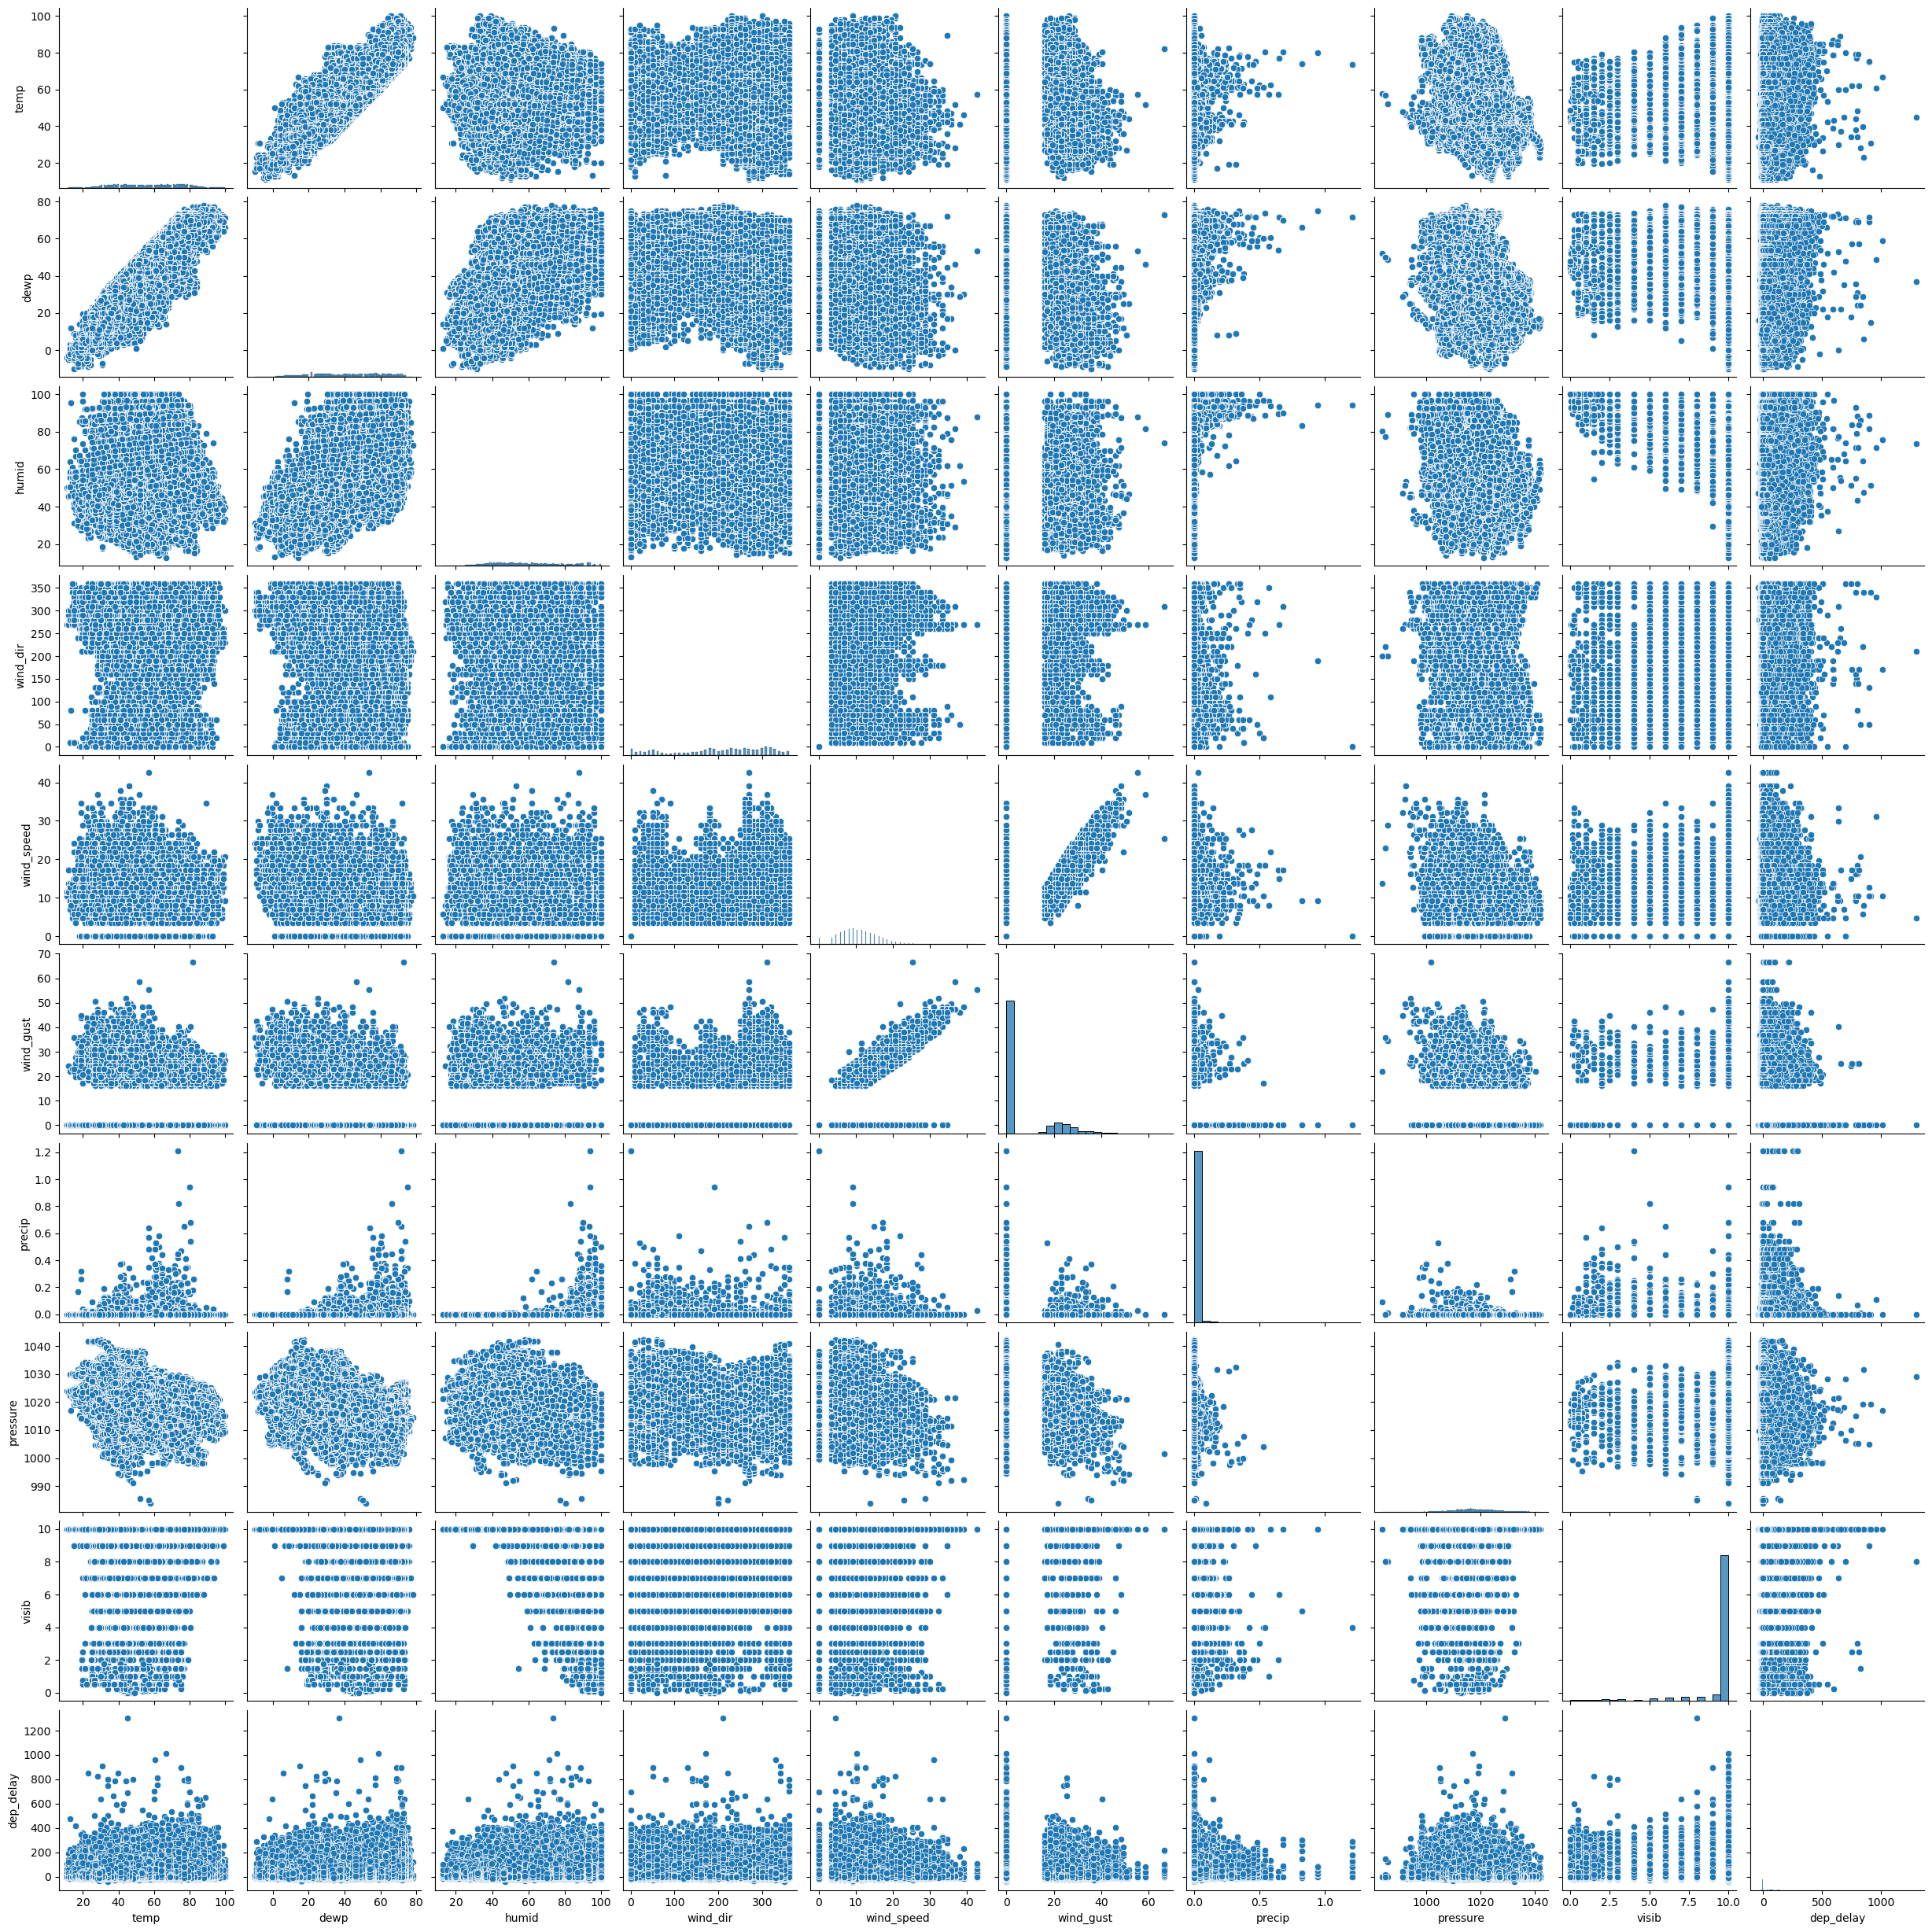

In [20]:
sns.pairplot(cx_delays_weather)

<h2>Airlines</h2>

<b>7. Create a ranking of airlines based on the number of flights they operate.</b>

In [21]:
#Join the two datasets to add the name of the carrier
ranking_num_flights = dataframes['nyc_flights_fixed'].merge(dataframes['nyc_airlines'], on='carrier')

#Group by the name of the carrier
ranking_num_flights = ranking_num_flights.groupby('name')['flight'].count()

#Cast the series as a dataframe
ranking_num_flights = pd.DataFrame(ranking_num_flights).reset_index()

#Sorting
ranking_num_flights.sort_values('flight', ascending=False, inplace=True)

#Renaming the flight column to number of flights
ranking_num_flights.rename({'flight':'number of flights'}, axis=1, inplace=True)

ranking_num_flights.reset_index(drop=True)

,name,number of flights
0,United Air Lines Inc.,55802
1,ExpressJet Airlines Inc.,54173
2,JetBlue Airways,50194
3,Delta Air Lines Inc.,46669
4,US Airways Inc.,19837
5,Endeavor Air Inc.,17416
6,Southwest Airlines Co.,12237
7,American Airlines Inc.,10090
8,Virgin America,5162
9,AirTran Airways Corporation,3073


<b>8. Create a ranking of airlines based on the daily availability of seats.</b>

In [23]:
#Slice the dataframe to get the useful attributes
ranking_availability_seats = dataframes['nyc_flights_fixed'][['tailnum','date','carrier']]

#merging number of seats per airplane
ranking_availability_seats = ranking_availability_seats.merge(
                            dataframes['nyc_planes'][['tailnum','seats']],
                            on='tailnum')

#mergin carrier's name
ranking_availability_seats = ranking_availability_seats.merge(
                            dataframes['nyc_airlines'],
                            on='carrier')

#Calculate the total number of available seats per day per airline
ranking_availability_seats = pd.DataFrame(
                            ranking_availability_seats.groupby(
                                                            ['name','date']
                                                            )['seats'].sum()).reset_index()

#Calculate the daily average number of seats available per airline
ranking_availability_seats = pd.DataFrame(ranking_availability_seats.groupby('name')['seats'].mean()).reset_index()

#Sorting by daily seats
ranking_availability_seats.sort_values('seats', ascending=False).reset_index(drop=True)

,name,seats
0,United Air Lines Inc.,26940.666667
1,Delta Air Lines Inc.,21499.926230
2,JetBlue Airways,17807.500000
3,US Airways Inc.,9446.010959
4,ExpressJet Airlines Inc.,8798.825137
5,American Airlines Inc.,5417.887978
6,Southwest Airlines Co.,4725.863014
7,Endeavor Air Inc.,3773.442623
8,Virgin America,2517.961644
9,AirTran Airways Corporation,901.215847


<h2>Airplanes</h2>

<b>9. Determine the most common plane manufacturer.</b>

In [26]:
dataframes['nyc_planes']['manufacturer'].value_counts()

manufacturer
BOEING                           1630
AIRBUS INDUSTRIE                  400
BOMBARDIER INC                    368
AIRBUS                            336
EMBRAER                           299
MCDONNELL DOUGLAS                 120
MCDONNELL DOUGLAS AIRCRAFT CO     103
MCDONNELL DOUGLAS CORPORATION      14
CANADAIR                            9
CESSNA                              9
PIPER                               5
BEECH                               2
BELL                                2
STEWART MACO                        2
GULFSTREAM AEROSPACE                2
AMERICAN AIRCRAFT INC               2
CANADAIR LTD                        1
BARKER JACK L                       1
DEHAVILLAND                         1
MARZ BARRY                          1
LEBLANC GLENN T                     1
FRIEDEMANN JON                      1
ROBINSON HELICOPTER CO              1
LEARJET INC                         1
LAMBERT RICHARD                     1
KILDALL GARY                        1

<b>10. Identify the most common plane model.</b>

In [29]:
dataframes['nyc_planes'][['manufacturer','model']].value_counts()

manufacturer      model      
BOEING            737-7H4        361
BOMBARDIER INC    CL-600-2B19    162
AIRBUS            A320-232       129
AIRBUS INDUSTRIE  A320-232       127
BOMBARDIER INC    CL-600-2D24    123
                                ... 
CESSNA            172M             1
                  172N             1
                  210-5(205)       1
                  310Q             1
STEWART MACO      FALCON-XP        1
Name: count, Length: 147, dtype: int64